###  1. 数据载入和总览

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

from pandas import Series,DataFrame

#### 1.1 数据载入

In [2]:
%%time
contb1 = pd.read_csv('./usa_elect/contb_01.csv')
contb2 = pd.read_csv('./usa_elect/contb_02.csv')
contb3 = pd.read_csv('usa_elect/contb_03.csv')

Wall time: 1.77 s


#### 1.2 数据合并

In [3]:
contb1.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [4]:
contb3.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Perry, Rick","NORRIS, BOBBY",TX,SELF,REALTOR/ RANCHER,1000.0,14-DEC-11
1,"Perry, Rick","HUNT, CAROLINE",TX,HOMEMAKER,HOMEMAKER,2500.0,14-DEC-11
2,"Perry, Rick","ROBINOWITZ, DALE",TX,SELF-EMPLOYED,DENTIST,2500.0,14-DEC-11
3,"Perry, Rick","ZUNIGA, DAVID & SYLVIA",TX,DAVID M. ZUNIGA PE,OWNER,250.0,14-DEC-11
4,"Perry, Rick","FOSTER, GLENNA",TX,SELF,INVESTOR/ CONSULTANT,1500.0,14-DEC-11


In [5]:
contb = pd.concat([contb1,contb2,contb3],axis = 0)

#### 1.3 数据预览和基本统计分析

In [6]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [7]:
contb.shape

(1001733, 7)

In [8]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    988004 non-null   object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [9]:
contb.describe()

,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


### 2. 数据清洗

#### 2.1 缺失值处理

In [10]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    988004 non-null   object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [11]:
cond = contb['contbr_employer'].isnull()
contb[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
41,"Bachmann, Michelle","MINNIS, RITA",CA,NaN,NaN,-1500.0,20-JUN-11
264,"Bachmann, Michelle","BISHOP, GERARD",NY,NaN,NaN,-1700.0,28-JUN-11
752,"Romney, Mitt","KNIGHT, RENA",AL,NaN,NaN,-60.0,07-MAR-12
897,"Romney, Mitt",THE STEWART FIRM L.L.C.,AL,NaN,NaN,250.0,23-MAR-12
1033,"Romney, Mitt","SELLERS, LEE",AL,NaN,NaN,-120.0,20-JAN-12
...,...,...,...,...,...,...,...
1715,"Perry, Rick",TEXAS ENERGY L.L.C.,WY,NaN,NaN,250.0,30-SEP-11
1717,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,12-NOV-11
1720,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,01-OCT-11
1722,"Perry, Rick","HARDER, ROBERT",WY,NaN,RETIRED,100.0,29-OCT-11


In [12]:
# 没有提供NOT PROVIDE 公司保密，没有来得及写
contb['contbr_employer'].fillna('NOT PROVIDE',inplace = True)

In [13]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    1001733 non-null  object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [14]:
contb['contbr_occupation'].fillna('NOT PROVIDE',inplace = True)

In [15]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    1001733 non-null  object 
 4   contbr_occupation  1001733 non-null  object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [16]:
cond = contb['contbr_st'].isnull()
contb[cond]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
453997,"Obama, Barack","NEWBURG, ANDRE",NaN,NOT EMPLOYED,RETIRED,1000.0,01-DEC-11
453998,"Obama, Barack","HARBARD, SONJA",NaN,SELF-EMPLOYED,WRITER,250.0,31-MAR-12
453999,"Obama, Barack","LAKIN-THOMAS, PATRICIA",NaN,YORK UNIVERSITY,UNIVERSITY PROFESSOR,300.0,31-MAR-12
454000,"Obama, Barack","MICHAEALS, MARNIN",NaN,BAKER & MCKENZIE ZURICH,ATTORNEY,250.0,31-MAR-12


In [17]:
contb['contbr_st'].fillna('NOT PROVIDE',inplace = True)

In [18]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001733 non-null  object 
 3   contbr_employer    1001733 non-null  object 
 4   contbr_occupation  1001733 non-null  object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


#### 2.2 数据转换
#### 利用字典映射进行转换：党派分析

In [19]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [20]:
contb.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [21]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [22]:
%%time
# map中可以传递字典，100万数据，增加一列耗时125ms
contb['party'] = contb['cand_nm'].map(parties)

Wall time: 135 ms


In [23]:
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [24]:
contb['party'].value_counts()

Democrat      593747
Republican    407986
Name: party, dtype: int64

In [25]:
contb.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [26]:
contb.groupby('party')['contb_receipt_amt'].sum()

party
Democrat      1.335028e+08
Republican    1.652498e+08
Name: contb_receipt_amt, dtype: float64

#### 排序：按照职业汇总对赞助总金额进行排序

In [27]:
grouped_occupation = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum()


In [28]:
occupation = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDE',
             'INFORMATION REQUESTED':'NOT PROVIDE',
              'C.E.O':'CEO',
              'LAWYER':'ATTORNEY',
              'SELF':'SELF-EMPLOYED',
              'SELF EMPLOYED ':'SELF-EMPLOYED'}

In [29]:
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDE                                4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [30]:
f = lambda x : occupation.get(x,x)
contb['contbr_occupation'] = contb['contbr_occupation'].map(f)

In [31]:
grouped_occupation = contb.groupby(['contbr_occupation'])['contb_receipt_amt'].sum()
grouped_occupation.sort_values(ascending=False)[:50]

contbr_occupation
RETIRED                  48176647.00
NOT PROVIDE              28826632.53
ATTORNEY                 22008455.49
HOMEMAKER                17484807.65
PHYSICIAN                 7224044.40
PRESIDENT                 6347843.59
EXECUTIVE                 5273717.90
CONSULTANT                4932627.98
CEO                       3594443.20
OWNER                     3278488.16
INVESTOR                  3204481.92
ENGINEER                  2730527.43
SELF-EMPLOYED             2628341.10
PROFESSOR                 2458033.81
C.E.O.                    2433218.11
MANAGER                   2167571.47
REAL ESTATE               2110499.34
SALES                     1814901.82
NOT EMPLOYED              1752927.93
BUSINESS OWNER            1736511.73
TEACHER                   1709754.05
CHAIRMAN                  1691595.37
STUDENT                   1679435.28
FINANCE                   1664021.31
BANKER                    1462903.13
WRITER                    1303267.29
PARTNER             

按照职位进行汇总，计算赞助总金额，展示前20项，发现不少职业是相同的，只不过是表达不一样而已，如C.E.O.与CEO，都是一个职业

#### 利用函数进行数据转换：职业与雇主信息分析

建立一个职业对应字典，把相同职业的不同表达映射为对应的职业，比如把C.E.O.映射为CEO

In [32]:
contb.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [33]:
employer = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDE',
            'INFORMATION REQUESTED':'NOT PROVIDE',
            'SELF':'SELF-EMPLOYED',
            'SELF EMPLOYED':'SELF-EMPLOYED'}

In [34]:
# 按照公司进行统计，汇总
contb.groupby(['contbr_employer'])['contb_receipt_amt'].sum().sort_values(ascending = False).shape

(135651,)

In [35]:
f = lambda x : employer.get(x,x)
contb['contbr_employer'] = contb['contbr_employer'].map(f)

In [36]:
contb.groupby(['contbr_employer'])['contb_receipt_amt'].sum().sort_values(ascending = False)[:50]

contbr_employer
RETIRED                                 41374333.67
SELF-EMPLOYED                           37483895.22
NOT PROVIDE                             31281997.76
HOMEMAKER                               14738524.86
NOT EMPLOYED                             8636809.43
NONE                                     3809582.99
STUDENT                                   957971.85
REQUESTED                                 894009.54
MORGAN STANLEY                            386129.40
UNEMPLOYED                                377088.31
INFORMATION REQUESTED (BEST EFFORTS)      340503.63
CREDIT SUISSE                             300740.90
VOLUNTEER                                 294118.02
MICROSOFT                                 286304.32
GOLDMAN SACH & CO.                        233250.00
US ARMY                                   230796.52
GOLDMAN SACHS                             205338.57
BANK OF AMERICA                           197408.93
IBM                                       197129

#### 2.3 数据筛选

赞助金额筛选

In [37]:
# 捐赠金额大于0
contb_ = contb[contb['contb_receipt_amt'] > 0]
contb_.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,NOT PROVIDE,NOT PROVIDE,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [38]:
contb.shape

(1001733, 8)

In [39]:
contb_.shape

(991477, 8)

In [40]:
#查看各候选人获得的赞助总金额
cand_nm_amt = contb_.groupby(['cand_nm'])['contb_receipt_amt'].sum().sort_values(ascending = False)

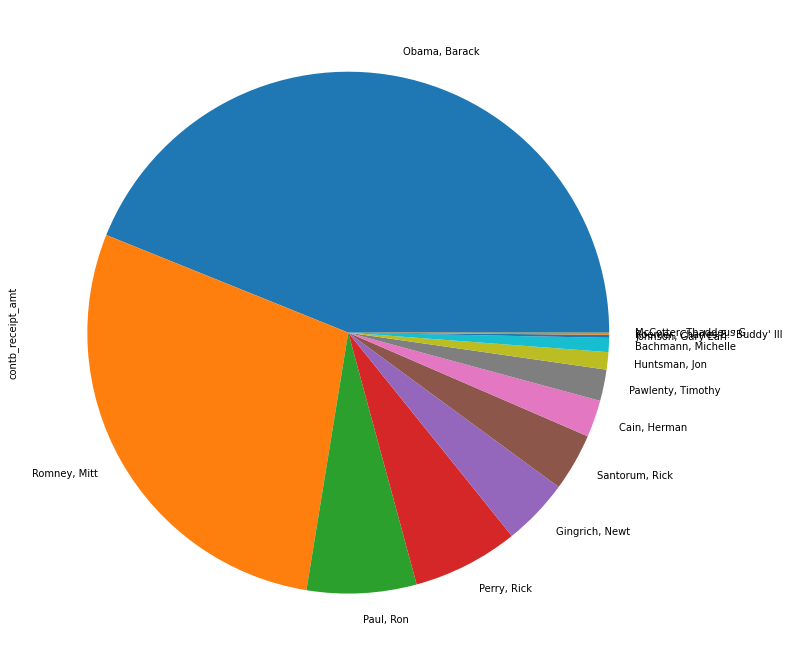

In [41]:
plt.figure(figsize=(12,12))
cand_nm_amt.plot(kind = 'pie')

In [42]:
contb_.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [43]:
#选取候选人为Obama、Romney的子集数据
# 方式一：
cond1 = contb_['cand_nm'] == 'Obama, Barack'
cond2 = contb_['cand_nm'] == 'Romney, Mitt'

cond = cond1|cond2
contb_vs = contb_[cond]
contb_vs

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
...,...,...,...,...,...,...,...,...
201381,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,Democrat
201382,"Obama, Barack","TAITANO, TYRONE",ZZ,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,Democrat
201383,"Obama, Barack","TUCKER, PAMELA",ZZ,DODEA,EDUCATOR,3.0,20-JAN-12,Democrat
201384,"Obama, Barack","MOUNTS, ROBERT",ZZ,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,Democrat


In [44]:
contb_vs2 = contb_.query("cand_nm == 'Obama, Barack' or cand_nm == 'Romney, Mitt'")

In [45]:
contb_vs2.shape

(694283, 8)

In [46]:
cond = contb_['cand_nm'].isin(['Romney, Mitt','Obama, Barack'])
contb_vs3 = contb_[cond]

In [47]:
contb_vs3.shape

(694283, 8)

#### 2.4 面元化数据

接下来我们对该数据做另一种非常实用的分析，利用cut函数根据出资额大小将数据离散化到多个面元中

In [48]:

contb_.contb_receipt_amt.unique().sort_values()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [ ]:
contb_.contb_receipt_amt.unique().size

In [ ]:
contb_.contb_receipt_amt.sort_values()

In [ ]:
contb_['contb_receipt_amt'].max()

In [ ]:
contb_['contb_receipt_amt'][:10]

In [91]:
bins = [0,1,10,100,1000,10000,100000,1000000,10000000]

labels = pd.cut(contb_['contb_receipt_amt'],bins)
labels

0         (100, 1000]
1           (10, 100]
2         (100, 1000]
3         (100, 1000]
4         (100, 1000]
            ...      
1726    (1000, 10000]
1727    (1000, 10000]
1728      (100, 1000]
1729      (100, 1000]
1730    (1000, 10000]
Name: contb_receipt_amt, Length: 991477, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [92]:
labels = pd.cut(contb_vs['contb_receipt_amt'],bins)
labels.shape

(694283,)

### 3. 数据聚合与分组运算

#### 3.1 透视表(pivot_table)分析党派和职业

In [ ]:
contb_.columns

In [51]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
ret = contb_.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum',fill_value=0)
ret

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0
AREA VICE PRESIDENT,250.0,0.0
RESEARCH ASSOCIATE,100.0,0.0
TEACHER,500.0,0.0
THERAPIST,3900.0,0.0
...,...,...
ZOOKEEPER,35.0,0.0
ZOOLOGIST,400.0,0.0
ZOOLOGY EDUCATION,25.0,0.0


In [52]:
ret.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0
AREA VICE PRESIDENT,250.0,0.0
RESEARCH ASSOCIATE,100.0,0.0
TEACHER,500.0,0.0
THERAPIST,3900.0,0.0


In [53]:
ret.shape

(45063, 2)

In [54]:
index = Series(ret.sum(axis = 1).sort_values(ascending = False).index)

In [55]:
index.shape

(45063,)

In [56]:
ret[index]

KeyError: "None of [Index(['RETIRED', 'NOT PROVIDE', 'ATTORNEY', 'HOMEMAKER', 'PHYSICIAN',\n       'PRESIDENT', 'EXECUTIVE', 'CONSULTANT', 'CEO', 'OWNER',\n       ...\n       'REMODELER & SEMI RETIRED', '3RD GENERATION FAMILY BUSINESS OWNER',\n       'ADMINISTRATION/INSTRUCTOR', 'LEAD UI/UX DEVELOPER',\n       'SPRINKLER FITTER FIRE PROTECTION SPECI', 'POLICY/ LAWYER',\n       'LAN/WAN ANALYST', 'SR MGR', 'VICE PRESIDENT, REAL ESTATE',\n       'FREELANCE VOICE-OVER'],\n      dtype='object', name='party', length=45063)] are in the [columns]"

In [57]:
ret.sum(axis = 1).sort_values(ascending = False)[:20]

contbr_occupation
RETIRED           4.886656e+07
NOT PROVIDE       3.469680e+07
ATTORNEY          2.217088e+07
HOMEMAKER         1.788315e+07
PHYSICIAN         7.329445e+06
PRESIDENT         6.599434e+06
EXECUTIVE         5.494011e+06
CONSULTANT        5.004638e+06
CEO               3.715043e+06
OWNER             3.409854e+06
INVESTOR          3.315902e+06
ENGINEER          2.769899e+06
SELF-EMPLOYED     2.682894e+06
C.E.O.            2.594673e+06
PROFESSOR         2.461774e+06
MANAGER           2.207416e+06
REAL ESTATE       2.154804e+06
SALES             1.848352e+06
CHAIRMAN          1.792640e+06
BUSINESS OWNER    1.773322e+06
dtype: float64

In [58]:
ret['total'] = ret['Democrat'] + ret['Republican']

In [59]:
ret.head()

party,Democrat,Republican,total
contbr_occupation,,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.0,100.0
AREA VICE PRESIDENT,250.0,0.0,250.0
RESEARCH ASSOCIATE,100.0,0.0,100.0
TEACHER,500.0,0.0,500.0
THERAPIST,3900.0,0.0,3900.0


In [60]:
ret.sort_values(by = 'total',ascending=False)

party,Democrat,Republican,total
contbr_occupation,,,
RETIRED,25305316.38,2.356124e+07,4.886656e+07
NOT PROVIDE,13725187.32,2.097161e+07,3.469680e+07
ATTORNEY,14302461.84,7.868419e+06,2.217088e+07
HOMEMAKER,4248875.80,1.363428e+07,1.788315e+07
PHYSICIAN,3735124.94,3.594320e+06,7.329445e+06
...,...,...,...
POLICY/ LAWYER,3.00,0.000000e+00,3.000000e+00
AFFORDABLE REAL ESTATE DEVELOPER,0.00,3.000000e+00,3.000000e+00
ADMINISTRATION/INSTRUCTOR,3.00,0.000000e+00,3.000000e+00


In [61]:
#过滤掉赞助金额小于200W的数据

cond = ret['total'] < 2000000

index = ret[cond].index

ret_big = ret.drop(labels=index)

In [62]:
# 绘制献金前20数据
ret_big.shape

(17, 3)

In [63]:
ret_big

party,Democrat,Republican,total
contbr_occupation,,,
ATTORNEY,14302461.84,7.868419e+06,2.217088e+07
C.E.O.,1690.00,2.592983e+06,2.594673e+06
CEO,2074284.79,1.640758e+06,3.715043e+06
CONSULTANT,2459912.71,2.544725e+06,5.004638e+06
ENGINEER,951525.55,1.818374e+06,2.769899e+06
EXECUTIVE,1355161.05,4.138850e+06,5.494011e+06
HOMEMAKER,4248875.80,1.363428e+07,1.788315e+07
INVESTOR,884133.00,2.431769e+06,3.315902e+06
MANAGER,762883.22,1.444532e+06,2.207416e+06


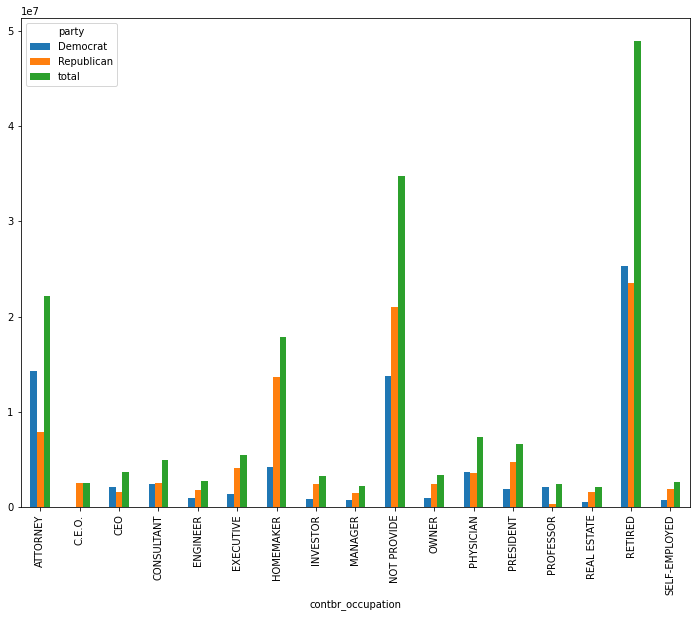

In [64]:
plt.figure(figsize=(12,9))
ax = plt.subplot(1,1,1)
ret_big.plot(kind = 'bar',ax = ax)

#### 3.2 分组级运算和转换

根据职业与雇主信息分组运算

In [66]:
contb_.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [78]:
grouped = contb_.groupby('cand_nm')

In [79]:
grouped

In [82]:
# grouped.groupby['contbr_occupation']['contb_receipt_amt'].sum().sort_values(ascending = False)[:5]
def my_fun(x,key,n):
    return x.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending=False)[:n]
grouped.apply(my_fun,'contbr_occupation',5)

cand_nm             contbr_occupation                   
Bachmann, Michelle  RETIRED                                  854785.17
                    NOT PROVIDE                              167705.00
                    HOMEMAKER                                105622.00
                    PHYSICIAN                                 77319.00
                    PRESIDENT                                 68831.00
                                                               ...    
Santorum, Rick      RETIRED                                 2160834.65
                    HOMEMAKER                               1033342.67
                    NOT PROVIDE                              968723.54
                    INFORMATION REQUESTED (BEST EFFORTS)     328323.63
                    PHYSICIAN                                314755.19
Name: contb_receipt_amt, Length: 65, dtype: float64

In [83]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理

def get_top_amounts(grouped,key,n):
#     !!!先分组，grouped，然后继续再分
    return grouped.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending = False)[:n]

grouped = contb_.groupby('cand_nm')


grouped.apply(get_top_amounts,'contbr_occupation',7)

cand_nm             contbr_occupation                   
Bachmann, Michelle  RETIRED                                 854785.17
                    NOT PROVIDE                             167705.00
                    HOMEMAKER                               105622.00
                    PHYSICIAN                                77319.00
                    PRESIDENT                                68831.00
                                                              ...    
Santorum, Rick      NOT PROVIDE                             968723.54
                    INFORMATION REQUESTED (BEST EFFORTS)    328323.63
                    PHYSICIAN                               314755.19
                    ATTORNEY                                293465.58
                    EXECUTIVE                               254517.55
Name: contb_receipt_amt, Length: 91, dtype: float64

In [86]:
grouped = contb_vs.groupby('cand_nm')

grouped.apply(get_top_amounts,'contbr_occupation',7).unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
ATTORNEY,14302461.84,5372424.02
C.E.O.,NaN,1968386.11
CONSULTANT,2459912.71,NaN
EXECUTIVE,NaN,2300947.03
HOMEMAKER,4248875.80,8147446.22
NOT PROVIDE,13725187.32,11638509.84
PHYSICIAN,3735124.94,NaN
PRESIDENT,NaN,2491244.89
PROFESSOR,2165071.08,NaN


In [87]:
for i in grouped:
    print(i)

('Obama, Barack',               cand_nm            contbr_nm contbr_st  \
107640  Obama, Barack        BARNARD, ERIC        AA   
107641  Obama, Barack       HESTER, COREEN        AA   
107642  Obama, Barack  ST. HILAIRE, PIERRE        AA   
107643  Obama, Barack  BRIDGEWATER, PAMELA        AA   
107647  Obama, Barack        BARNARD, ERIC        AA   
...               ...                  ...       ...   
201381  Obama, Barack       MOUNTS, ROBERT        ZZ   
201382  Obama, Barack      TAITANO, TYRONE        ZZ   
201383  Obama, Barack       TUCKER, PAMELA        ZZ   
201384  Obama, Barack       MOUNTS, ROBERT        ZZ   
201385  Obama, Barack          NEAL, AMBER        ZZ   

                               contbr_employer  \
107640                          U.S. AIR FORCE   
107641           THE AMERICAN SCHOOL IN LONDON   
107642                US DEPARTMENT OF JUSTICE   
107643                          DEPT. OF STATE   
107647                          U.S. AIR FORCE   
...      

从数据可以看出，Obama更受精英群体（律师、医生、咨询顾问）的欢迎，Romney则得到更多企业家或企业高管的支持

In [88]:
contb_vs.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'party'],
      dtype='object')

In [ ]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',10)

Obama：微软、盛德国际律师事务所； Romney：瑞士瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、H.I.G.资本

-----------------------------------------------------------

对赞助金额进行分组分析(matplotlib画图)

前面我们已经利用pd.cut()函数，根据出资额大小将数据离散化到多个面元中，接下来我们就要对每个离散化的面元进行分组分析

首先统计各出资区间的赞助笔数，这里用到unstack()，stack()函数是堆叠，unstack()函数就是不要堆叠，即把多层索引变为表格数据

接下来，我们再统计各区间的赞助金额

In [89]:
contb_vs.groupby(['cand_nm'])['contb_receipt_amt'].sum()

cand_nm
Obama, Barack    1.358776e+08
Romney, Mitt     8.833591e+07
Name: contb_receipt_amt, dtype: float64

In [96]:
contb_vs.groupby(['cand_nm',labels]).size().unstack(level = 0,fill_value = 0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [ ]:
#绘制Obama、Romney各区间赞助总金额
amt_vs = contb_vs.groupby(['cand_nm',labels]).sum().unstack(level = 0,fill_value = 0)
amt_vs.fillna(0,inplace=True)

In [ ]:
amt_vs.plot(kind = 'bar')

In [ ]:
cond = contb_vs.contb_receipt_amt > 100000

contb_vs[cond]

In [ ]:
# 个人捐款
amt_vs[:-2].plot(kind = 'bar')

上图虽然能够大概看出Obama、Romney的赞助金额区间分布，但对比并不够突出，如果用百分比堆积图效果会更好，下面我们就实现以下。

In [ ]:
#算出每个区间两位候选人收到赞助总金额的占比
# 百分比堆积图
amt_vs.div(amt_vs.sum(axis = 1),axis = 0)[:-2].plot(kind = 'bar',stacked = True)

可以看出，小额赞助方面，Obama获得的数量和金额比Romney多得多

按照赞助人姓名分组计数，计算重复赞助次数最多的前20人

### 4.时间处理

#### 4.1 str转datetime

In [ ]:
contb_vs.head()

In [ ]:
contb_vs.dtypes

In [ ]:
contb_vs['contb_receipt_dt'] = pd.to_datetime(contb_vs['contb_receipt_dt'])

In [ ]:
contb_vs.dtypes


In [ ]:
contb_vs.head()

#### 4.2 以时间作为索引

In [ ]:
contb_vs_time = contb_vs.set_index('contb_receipt_dt')
contb_vs_time.head()

#### 4.3重采样和频度转换

重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），resample会对数据进行分组，然后再调用聚合函数。这里我们把频率从每日转换为每月，属于高频转低频的降采样

In [ ]:
# 行索引是时间，那么我们就可以实现重采样
vs_m = contb_vs_time.groupby(['cand_nm']).resample('M')['contb_receipt_amt'].sum().unstack(level = 0)

In [ ]:
contb_vs.groupby(['cand_nm']).resample('M')['contb_receipt_amt'].sum()

In [ ]:
# 我们用面积图把11年4月-12年4月两位总统候选人接受的赞助笔数做个对比可以看出，
# 越临近竞选，大家赞助的热情越高涨，奥巴马在各个时段都占据绝对的优势
vs_m.plot(kind = 'bar')

In [ ]:
vs_m.plot(kind = 'line')

In [ ]:
plt.figure(figsize=(32,9))
ax = plt.subplot(1,1,1)
vs_m.plot(kind = 'area',ax = ax,alpha = 0.6)

### 5.各州支持率

In [ ]:
contb_vs.columns

In [ ]:
#依据州和候选人进行分组
state_vs = contb_vs.groupby(['cand_nm','contbr_st'])['contb_receipt_amt'].sum().unstack(level = 0)
state_vs

In [ ]:
state_vs.fillna(0,inplace=True)

In [ ]:
plt.figure(figsize=(23,9))

ax = plt.subplot(1,1,1)

state_vs.plot(kind = 'bar',ax = ax)

In [ ]:
state_vs_rate = state_vs.div(state_vs.sum(axis = 1),axis = 0)
state_vs_rate

In [ ]:
state_vs_rate.drop(labels=['AA','AB','AE','NOT PROVIDE'],inplace = True)

In [ ]:
state_vs_rate

In [ ]:
# basemape 工具包，pip install basemap
# basemape绘制地图，pip install 无法安装成功
# 下载：https://www.lfd.uci.edu/~gohlke/pythonlibs/

In [ ]:
state_vs_rate

In [ ]:
state_vs_rate['Obama, Barack'].iloc[0]

In [ ]:
oba = state_vs_rate['Obama, Barack']
oba

In [ ]:
cmap = plt.cm.YlOrBr


for i in range(10):
    print(i)
    plt.plot(np.arange(10) + i,c = cmap(state_vs_rate['Obama, Barack'].iloc[i]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [ ]:
from matplotlib.patches import Polygon

In [ ]:
cmap(0)

In [ ]:
oba['AK']

In [ ]:
oba['MA']

In [ ]:
oba['RI']

In [ ]:
# 州全称对应缩写缩写
abbr = {'Commonwealth of Kentucky':'KY','Commonwealth of Massachusetts':'MA','Commonwealth of Pennsylvania':'PA',
        'State of Rhode Island and Providence Plantations':'RI'}

In [ ]:
'''llcrnrlon	所需地图域（度）的左下角经度。
llcrnrlat	所需地图域左下角的纬度（度）。
urcrnrlon	所需地图域（度）的右上角经度。
urcrnrlat	所需地图域右上角的纬度（度）。
'''



# hex16进制表示的颜色
from matplotlib.colors import rgb2hex

plt.figure(figsize=(12,9))
# lat_1 or lat_0 and lon_0
m = Basemap(llcrnrlon = -122,
           llcrnrlat = 23.41,
           urcrnrlon = -64,
           urcrnrlat = 45,
           projection = 'lcc',
            lat_1 =30,
            lon_0 = -100
            )

m.drawcoastlines(linewidth=1.5)
m.drawcountries(linewidth = 1.5)
# m.drawstates()

# 地图读取了美国地图形状，m中就有各州的形状，数据
m.readshapefile('./USA/gadm36_USA_1',name = 'states')


colors = []
states = []

cmap = plt.cm.Reds

for shapeinfo in m.states_info:
    a = shapeinfo['VARNAME_1']
#     州的缩写
    s = a.split('|')[0]
    
#     可以代表颜色
    try:
        rate = oba[s]
    
        colors.append(cmap(rate))
        states.append(s)
    except:
        colors.append(cmap(oba[abbr[s]]))
        states.append(s)
    
# 州填充颜色
# seg州中的一部分区域，多边形
ax = plt.gca()
for n,seg in enumerate(m.states):
    c = rgb2hex(colors[n])
    poly = Polygon(seg,color = c )
    ax.add_patch(poly)
    
plt.show()

In [ ]:
colors = []
states = []
for shapeinfo in m.states_info:
    a = shape['VARNAME_1']
#     州的缩写
    s = a.split('|')[0]
    print('+++++++++++++++++++++++++++',s)
#     可以代表颜色
    try:
        rate = oba[s]
        print('----------------',rate)
    
        colors.append(cmap(rate))
        states.append(s)
    except:
        colors.append(cmap(0))
        states.append(s)

In [ ]:
for n,seg in enumerate(m.states):
    print(n)

In [ ]:
oba['AL']

In [ ]:
for shape in m.states_info:
    print(shape['VARNAME_1'].split('|')[0])

In [ ]:
for shape in m.states_info:
    print(shape['VARNAME_1'].split('|')[0])

In [ ]:
for 

In [ ]:
# 州全称对应缩写缩写
abbr = {'Commonwealth of Kentucky':'KY','Commonwealth of Massachusetts':'MA','Commonwealth of Pennsylvania':'PA',
        'State of Rhode Island and Providence Plantations':'RI'}

![](usa_states_rate.jpg)

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# 常规操作， 导入numpy, matplotlib.pyplot和basemap
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# 设置地图正射投影点为北纬50度， 西经100度，海岸线的分辨率为低 
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
# 画出海岸线（描边）
map.drawcountries(linewidth=0.25)
# 画出国境线（描边）
map.fillcontinents(color='coral',lake_color='aqua')
# 填充大陆, 大陆颜色为珊瑚色， 湖泊颜色为水色
map.drawmapboundary(fill_color='aqua')
# 画出地图边界，海洋区域颜色为水色
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# 每三十度画出经纬度线
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# 在规则网格上填充数据
x, y = map(lons*180./np.pi, lats*180./np.pi)
#投影到球面上
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
# 以x,y为基准协调画出wave+mean的轮廓线， 轮廓线条数为15. 参数详情见
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.contour.html
plt.title('contour lines over filled continent background')
plt.show()
plt.savefig('contour lines over continent.jpg')


In [ ]:
from mpl_toolkits.basemap import Basemap, cm
# cm(colormap)库提供一系列彩色地图
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
#同上文，导入numpy, matplotlib.pyplot，导入netCDF4中的Dataset处理网络通用
#数据格式（net common data form）

nc = NetCDFFile('nws_precip_conus_20061222.nc')
#首先在http://water.weather.gov/precip/中下载2006年12月22日的美国本土
#（不含阿拉斯加与夏威夷）的降水量数据
#导入我们需要用到的dataset， 值得注意的是该网站17年3月后的数据格式更新， 
#通过查询变量名发现数据格式与之前有很大差异
print(nc.variables.keys())
# 输出查看数据中的变量名
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# 标准化降水量与提取经纬度参数
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
#创建图像对象，设置图像大小与轴线起始位置 
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
#画立体投影图， 设置图形上下左右四个边界点经纬度参数坐标，中心点经纬度参
#数坐标,定义地图投影的球面半径(默认值为6370997米，近似于地球的半径），
#分辨率以及阈值 
# 注: area_thresh = 10000 意味着面积小于10000平方公里的湖泊等对象将不被作图
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# 画海岸线，州界， 国界线
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
#以10度为间隔画出0度到北纬90度纬线， 并且在图像左侧设置纬线标签
meridians = np.arange(180.,360.,10.)
#以10度为间隔画出西经180度到本初子午线经线， 并且在图像下侧设置经线标签
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny)
# 经纬线空间均匀
x, y = m(lons, lats) 
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# 添加参数表，以x,y为基准画出data的轮廓线，等轮廓线参数为clevs，填充颜色画出填充后的轮廓线
cbar = m.colorbar(cs,location='bottom',pad="5%")
#添加色标, 每个色标占5%（一共20个色标）
cbar.set_label('mm')
# 添加标签 单位：毫米
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
# 添加图像名
plt.show()
plt.savefig('24hrs rainfall of 20061222 for CONUS.jpg')

In [ ]:
plt.figure(figsize=(8, 8))
#设新图
m = Basemap(projection='ortho', resolution=None, lat_0=30, lon_0=120)
#正射投影，投影原点设在了上海周边
m.bluemarble(scale=0.5);

In [ ]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
#python标准库 日期与时间
from dateutil import tz
#这是一个第三方库，拓展了标准时间库，tz = time zone
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# 新图对象
map = Basemap(projection='mill',lon_0=180)
#米勒投影法，此投影与墨卡托投影类似，只是极点区域的面积变形不如后者大。向极点靠近时，两
#条纬线的间距比墨卡托投影的小。这样就降低了面积变形程度，但这会导致局部形状和方向发生变形。
map.drawcoastlines()
#画海岸线
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
#numpy的作用只是提供了数组
map.drawmapboundary(fill_color='aqua')
#边界aqua(水）色
map.fillcontinents(color='coral',lake_color='aqua')
#大陆珊瑚色，湖泊水色
date = datetime.now()
#这个是local时间，我所在的芝加哥地区是(CST)central standard time
#如果想取格林尼治时间（Coordinated Universal Time），以上这句改为
#date = datetime.utcnow()即可
CS=map.nightshade(date)
#basemap中的nightshade函数用作将夜晚区域覆盖作阴影，具体参数不扩展
#有兴趣了解搜索basemap.nightshade即可
plt.title('Day/Night Map for %s (CST)' % date.strftime("%d %b %Y %H:%M:%S"))
#设置图名， datetime格式日/月/年/时/分/秒
plt.show()